# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install (Version 4.4.0, Release Date: May 31, 2017) with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment1 using this file format:</u> <b>Yourfirstname_lastname_Assignment2.ipynb</b> 

#### <b>Deadline</b>: <u>Thursday, Nov-01-2017 11:59 PM.</u>


# Assignment 3 -- Part 1

In this part, you will use SVM from sklearn to classify non-linearly sperable datasets. 

Hint: Refer to the example in sklearn http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html, you can use this code or part of it in your solutions.

Load (using load_breast_cancer) datasets from sklearn (datasets.load_breast_cancer()):



a. select and evalute the "best kernal SVM" and the "worse kernel SVM" model could fit this dataset (you can impericlly select the hyperparameters values), justify your answer.[15 pts]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import mode
from random import randrange

# import data
dataset = load_breast_cancer()
#print(type(dataset))
#print(dataset.target.shape)

# Take the features and preprocessing
X = dataset.data
y = dataset.target

normalized_X = preprocessing.normalize(X)
standardized_X = preprocessing.scale(X)

print (np.amin(normalized_X))
print(np.amax(normalized_X))

C = 1e6

#SVM with gaussian kernals
model_g = SVC(kernel='rbf', gamma=1e-8, C=C, random_state=0)
y_pred_g = cross_val_predict(model_g, standardized_X, y, cv=5)
print('******************** SVM with Gaussian kernal ********************')
print(metrics.classification_report(y, y_pred_g))
print(metrics.confusion_matrix(y, y_pred_g))

#SVM with linear kernals
model_l = SVC(kernel='linear', C=C, random_state=0)
y_pred_l = cross_val_predict(model_l, standardized_X, y, cv=5)
print('******************** SVM with Linear kernal ********************')
print(metrics.classification_report(y, y_pred_l))
print(metrics.confusion_matrix(y, y_pred_l))



0.0
0.921243290304
******************** SVM with Gaussian kernal ********************
             precision    recall  f1-score   support

          0       0.99      0.94      0.97       212
          1       0.97      0.99      0.98       357

avg / total       0.98      0.98      0.98       569

[[200  12]
 [  2 355]]
******************** SVM with Linear kernal ********************
             precision    recall  f1-score   support

          0       0.93      0.95      0.94       212
          1       0.97      0.96      0.96       357

avg / total       0.96      0.96      0.96       569

[[202  10]
 [ 15 342]]


According to the dataset, if d (number of training samples) is small (up to 1000), and n (number of features) is intermediate (up to 10,000), SVM with gaussian kernal is better to use. In this case, d=569 and n=30, so SVM with gaussian kernal is the "best kernal SVM" and SVM with linear kernal is the "worse kernal SVM".

The result of cross validation accuracy for gaussian and linear kernals show as follow, we can see the SVM with gaussian kernal is better than the SVM with linear kernal.

b. report the cross validation accuracy for the "best kernel SVM" and the "worse kernel SVM" classifier.[15 pts]

In [3]:
print('******************** SVM with Gaussian kernal ********************')
print(metrics.classification_report(y, y_pred_g))
print(metrics.confusion_matrix(y, y_pred_g))

print('******************** SVM with Linear kernal ********************')
print(metrics.classification_report(y, y_pred_l))
print(metrics.confusion_matrix(y, y_pred_l))

******************** SVM with Gaussian kernal ********************
             precision    recall  f1-score   support

          0       0.99      0.94      0.97       212
          1       0.97      0.99      0.98       357

avg / total       0.98      0.98      0.98       569

[[200  12]
 [  2 355]]
******************** SVM with Linear kernal ********************
             precision    recall  f1-score   support

          0       0.93      0.95      0.94       212
          1       0.97      0.96      0.96       357

avg / total       0.96      0.96      0.96       569

[[202  10]
 [ 15 342]]


c. Using random search, what is the optimimum hyperparameter values for the "optimum model" ?[20 pts]

In [4]:
# create and fit a ridge regression model, testing each alpha
model = SVC(gamma=0.0000007)

#decide the range according to the hyperparameters selection empirically in the first question
C_range = np.logspace(5, 7, 10000)
gamma_range = np.logspace(-9, -7, 10000)


# specify parameters and distributions to sample from
param_dist = {"gamma": gamma_range,
              "C": C_range}

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=n_iter_search)

random_search.fit(standardized_X, y)

best_gamma = random_search.best_estimator_.gamma
best_C = random_search.best_estimator_.C

# summarize the results of the random search
print(random_search.best_score_)
print('The optimum gamma for gaussian kernal is\n', best_gamma)
print('The optimum C for gaussian kernal is\n', best_C)

model_g_optimum = SVC(kernel='rbf', gamma=best_gamma, C = best_C)
y_pred_g_optimum  = cross_val_predict(model_g_optimum , standardized_X, y, cv=5)

print('******************** SVM with Gaussian kernal ********************')
print(metrics.classification_report(y, y_pred_g_optimum))
print(metrics.confusion_matrix(y, y_pred_g_optimum))


0.978910369069
The optimum gamma for gaussian kernal is
 4.38393580875e-09
The optimum C for gaussian kernal is
 9371242.5742
******************** SVM with Gaussian kernal ********************
             precision    recall  f1-score   support

          0       0.99      0.94      0.97       212
          1       0.97      0.99      0.98       357

avg / total       0.98      0.98      0.98       569

[[200  12]
 [  2 355]]


d. (This part for gradaute students only): Randomly select 20 % data for testing and the reset for training. plot the decision surface for "worse SVM", "best SVM" and "optimum SVM" and report the accuracy result for each one, you can use build-in sklean function for visulization.[20 pts]

In [5]:
model = ExtraTreesClassifier(random_state=0)
model.fit(standardized_X, y)
# display the relative importance of each attribute
print('Relative importance of each attribute\n', model.feature_importances_)

Relative importance of each attribute
 [ 0.01725187  0.01320357  0.06349311  0.1147696   0.00773111  0.01885758
  0.11902489  0.06283854  0.00987869  0.01257364  0.00837636  0.00624402
  0.02042836  0.01887639  0.00774234  0.00810453  0.00801813  0.00678407
  0.0088145   0.00856559  0.09249527  0.02673948  0.12326299  0.03701585
  0.01490545  0.01315651  0.0136514   0.11395917  0.01620687  0.00703013]


In [6]:
X_train, X_test, y_train, y_test = train_test_split( standardized_X, y, test_size = 0.2, random_state = 100)
#print(type(X_train))

# report accuracy for best model
Best_model = SVC(kernel='rbf', gamma=1e-8, C=C)
Best_model = Best_model.fit(X_train, y_train)
y_predict_best = Best_model.predict(X_test)
a1 = accuracy_score(y_test, y_predict_best)
b1 = accuracy_score(y_train, Best_model.predict(X_train))
print('******************** Best SVM (SVM with Gaussian kernal) ********************')
print('Train accuracy:', b1)
print('Test accuracy:', a1)

# report accuracy for worse model
Worse_model = SVC(kernel='linear', C=C)
Worse_model = Worse_model.fit(X_train, y_train)
y_predict_worse = Worse_model.predict(X_test)
a2 = accuracy_score(y_test, y_predict_worse)
b2 = accuracy_score(y_train, Worse_model.predict(X_train))
print('******************** Worse SVM (SVM with Linear kernal) ********************')
print('Train accuracy:',b2)
print('Test accuracy:',a2)

# report accuracy for optimum model
Optimum_model = SVC(kernel='rbf', gamma=best_gamma, C=best_C)
Optimum_model = Optimum_model.fit(X_train, y_train)
y_predict_optimum = Optimum_model.predict(X_test)
a3 = accuracy_score(y_test, y_predict_optimum)
b3 = accuracy_score(y_train, Optimum_model.predict(X_train))
print('******************** Optimum SVM (Gaussian kernal with optimum gamma and C)********************')
print('Train accuracy:',b3)
print('Test accuracy:',a3)


******************** Best SVM (SVM with Gaussian kernal) ********************
Train accuracy: 0.984615384615
Test accuracy: 0.964912280702
******************** Worse SVM (SVM with Linear kernal) ********************
Train accuracy: 1.0
Test accuracy: 0.956140350877
******************** Optimum SVM (Gaussian kernal with optimum gamma and C)********************
Train accuracy: 0.986813186813
Test accuracy: 0.964912280702


In [7]:
# creat a mesh of points to plot in parameters
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# plot the decision boundaries for a classifier
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

y = dataset.target

models = (SVC(kernel='linear', C=C),
          SVC(kernel='rbf', gamma=1e-8, C=C),
          SVC(kernel='rbf', gamma=best_gamma, C=best_C))

# title for the plots
titles = ('Worse SVM (linear)',
          'Best SVM (gaussian)',
          'Optimum SVM (gaussian with optimum gamma and C)')

******************** Decision boundary for two most important features ********************


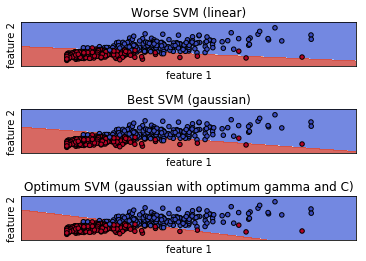

In [8]:
#choose 2 most significant features
X_1 = standardized_X[:,[6, 22]]

#plot decision boundary for two most significant features
models_1 = (clf.fit(X_1, y) for clf in models)

# Set-up 3 grid for plotting.
fig1, sub = plt.subplots(3, 1)
plt.subplots_adjust(wspace=1, hspace=1)

X0, X1 = X_1[:, 0], X_1[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models_1, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

print('******************** Decision boundary for two most important features ********************')
plt.show()


******************** Decision boundary for two most upimportant features ********************


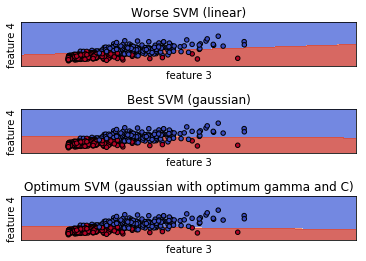

In [9]:
#choose 2 most unimportant features
X_2 = standardized_X[:,[11, 17]]

#plot decision boundary for two most significant features
models_2 = (clf.fit(X_2, y) for clf in models)

# Set-up 3 grid for plotting.
fig2, sub = plt.subplots(3, 1)
plt.subplots_adjust(wspace=1, hspace=1)

X2, X3 = X_2[:, 0], X_2[:, 1]
xx, yy = make_meshgrid(X2, X3)

for clf, title, ax in zip(models_2, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('feature 3')
    ax.set_ylabel('feature 4')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

print('******************** Decision boundary for two most upimportant features ********************')
plt.show()

# Assignment 3 -- Part 2

In this part, you will use decision tree from sklearn to classify non-linearly sperable datasets. 


Load Car Evaluation Data Set from https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data, read the dataset description and get faimilir with the dataset attributes https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names



a. Use decision tree to classify the dataset (evaluate cars to one of the four classes unacc, acc, good, v-good), use cross validation to report your results, you can use sklearn.tree.DecisionTreeClassifier .[25 pts]


In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
# download the file
data_car = pd.read_csv(url)
data_car.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class']
#print(data_car.head())

#encode strings as numeric features
le = preprocessing.LabelEncoder()
data_car = data_car.apply(le.fit_transform)

#separate the data from the target attributes
dataset_car = data_car.as_matrix()
#print(dataset_car)
X_car = dataset_car[:,0:6]
y_car = dataset_car[:,6]

# fit a CART model to the data
model_d = DecisionTreeClassifier()
#scores = cross_val_score(model_d, X_car, y_car, cv=5, scoring='f1_macro')
y_car_pred = cross_val_predict(model_d, X_car, y_car, cv=5)
print(metrics.classification_report(y_car, y_car_pred))
print(metrics.confusion_matrix(y_car, y_car_pred))
#print(np.average(scores))

             precision    recall  f1-score   support

          0       0.56      0.53      0.54       384
          1       0.45      0.77      0.56        69
          2       0.92      0.88      0.90      1209
          3       0.47      0.58      0.52        65

avg / total       0.80      0.79      0.79      1727

[[ 205   50   90   39]
 [   9   53    4    3]
 [ 141    3 1065    0]
 [  14   13    0   38]]


b. what is the optimum min_samples_split (The minimum number of samples required to split an internal node), does it make sense? why ?[25 pts]



In [11]:
# using grid search to find optimum min_samples_split parameter
min_split = np.arange(2,20)

model = DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, param_grid=dict(min_samples_split= min_split))
grid.fit(X_car, y_car)
#print(grid)

# summarize the results of the grid search
#print(grid.best_score_)
best_split = grid.best_estimator_.min_samples_split
print('The optimum min_samples_split is \n', best_split)

# clf = DecisionTreeClassifier(min_samples_split=best_split, max_depth=best_depth, min_samples_leaf=best_leaf)
# clf = clf.fit(X_car, y_car)
# export_graphviz(clf, out_file='tree.dot')    
model_dm = DecisionTreeClassifier(min_samples_split=best_split, class_weight="balanced", random_state=100)
y_car_dm_pred = cross_val_predict(model_dm, X_car, y_car, cv=5)
scores_dm = cross_val_score(model_dm, X_car, y_car, cv=5, scoring='f1_macro')
print('************************Cross validation*************************************')
print(metrics.classification_report(y_car, y_car_dm_pred))
print(metrics.confusion_matrix(y_car, y_car_dm_pred))
#print(np.average(scores_dm))

X_car_train, X_car_test, y_car_train, y_car_test = train_test_split( X_car, y_car, test_size = 0.2, random_state=0)
trained_model = model_dm.fit(X_car_train, y_car_train)
predictions = trained_model.predict(X_car_test)

print('********************Train and Test accuracy*****************************************')
print('Train accuracy is \n', accuracy_score(y_car_train, trained_model.predict(X_car_train)))
print('Test accuracy is \n',accuracy_score(y_car_test, predictions))
print(metrics.classification_report(y_car_test, predictions))
 

The optimum min_samples_split is 
 2
************************Cross validation*************************************
             precision    recall  f1-score   support

          0       0.54      0.56      0.55       384
          1       0.39      0.75      0.51        69
          2       0.95      0.88      0.91      1209
          3       0.54      0.62      0.58        65

avg / total       0.82      0.79      0.80      1727

[[ 216   78   56   34]
 [  13   52    4    0]
 [ 145    5 1059    0]
 [  25    0    0   40]]
********************Train and Test accuracy*****************************************
Train accuracy is 
 1.0
Test accuracy is 
 0.979768786127
             precision    recall  f1-score   support

          0       1.00      0.94      0.97        77
          1       1.00      0.86      0.92        14
          2       0.98      1.00      0.99       239
          3       0.89      1.00      0.94        16

avg / total       0.98      0.98      0.98       346



Using grid search, the optimum min_samples_split is 2. Comparing the cross validation results for all dataset, the results for optimum model is better than the results from model without optimum parameters.

Also, 20% data was randomly selected for testing and the reset for training. According to the accurarcy for training and testing data and the cross validation results for testing dataset, all of them get very high socore. Thus, optimum min_samples_split=2 is a good choice for this dataset.

C. (This part for graduate students only): Implement random forest classifer by defining multiple (DecisionTreeClassifier)'s from sklearn, you can use the max_features from DecisionTreeClassifier, compare your results to RandomForestClassifier from sklearn. Note: in this part implement the bagging/ensmble by yourself without calling build-in functions from sklearn (you still can use RandomForestClassifier from sklearn with max_features if you find it needed).[25 pts]

In [12]:
# Create a random subsample from the dataset with replacement
def subsample(dataset, feature, ratio):
    n = dataset.shape[0]
    num_sample = round(n * ratio)
    sample = np.zeros(shape=(num_sample, feature))
    for i in range(n):
        if i < sample.shape[0]:
            index = randrange(n)
            sample[i] = dataset[index]
    return sample

#a = subsample(X_car, 6, 0.8)
#print(a.shape)

# Random Forest Algorithm
def random_forest(train_data, test_data, n_trees, ratio):
    predictions = np.zeros(test_data.shape[0])
    for i in range(n_trees):
        train_data_1 = subsample(train_data, 7, ratio)
        train_X = train_data_1[:,0:6]
        train_y = train_data_1[:,6]
        test_X = test_data[:,0:6]
        test_y = test_data[:,6]
        model = DecisionTreeClassifier(max_features='sqrt')
        trained_model = model.fit(train_X, train_y)
        temp = trained_model.predict(test_X)
        predictions = np.concatenate((predictions, temp), axis=0)
    predictions_all = np.reshape(predictions, (n_trees+1, -1))
    predictions_all_1 = predictions_all[1:]
    m = mode(predictions_all_1)
    temp = accuracy_score(test_y, m[0].T)
    return(temp)

In [19]:
#using random_forest function
print('******************** Test accuracy with random_forest function************************')
dataset_car_train, dataset_car_test = train_test_split( dataset_car, test_size = 0.2, random_state=0)
accuracy = random_forest(dataset_car_train, dataset_car_test, 17, 0.8)
print('Test accuracy is \n',accuracy)

#using RandomForestClassifier from sklearn 
X_car_train = dataset_car_train[:,0:6]
y_car_train = dataset_car_train[:,6]
X_car_test = dataset_car_test[:,0:6]
y_car_test = dataset_car_test[:,6]
model = RandomForestClassifier(n_estimators = 17, max_features='sqrt')
trained_model_rf = model.fit(X_car_train, y_car_train)
predictions = trained_model_rf.predict(X_car_test)

print('********************Train and Test accuracy with RandomForestClassifier from sklearn************************')
print('Train accuracy is \n', accuracy_score(y_car_train, trained_model_rf.predict(X_car_train)))
print('Test accuracy is \n',accuracy_score(y_car_test, predictions))
print(metrics.classification_report(y_car_test, predictions))


******************** Test accuracy with random_forest function************************
Test accuracy is 
 0.968208092486
********************Train and Test accuracy with RandomForestClassifier from sklearn************************
Train accuracy is 
 1.0
Test accuracy is 
 0.965317919075
             precision    recall  f1-score   support

          0       0.97      0.94      0.95        77
          1       0.90      0.64      0.75        14
          2       0.98      1.00      0.99       239
          3       0.74      0.88      0.80        16

avg / total       0.97      0.97      0.96       346



The same training dataset and testing dataset were used for random forest function I wrote and the RandomForestClassifier from sklearn, the accuracy for testing data are 0.968208092486 and 0.965317919075, which are very close.